In [98]:
# basic imports 
import matplotlib.pyplot as plt 
from pathlib import Path 
from importlib import reload 
import time 

# Notebook imports 
from IPython.display import clear_output

# Learning imports 
import torch 
import gymnasium as gym

# Custom imports 
from RLManager import * 
import RLManager
import MissileEnv

In [201]:
def movmean(data, Nmean=50): 
    data = target_impact_lengths
    flat = np.ones(target_impact_lengths.shape)
    avg_filt = np.ones(Nmean) / Nmean
    edge_destroyer = 1 / np.convolve(flat, avg_filt, 'same')
    out = np.convolve(data, avg_filt, 'same') * edge_destroyer
    return out 

Misc Imports...
Torch imports...
Custom imports...
Finished imports.
Device: cuda


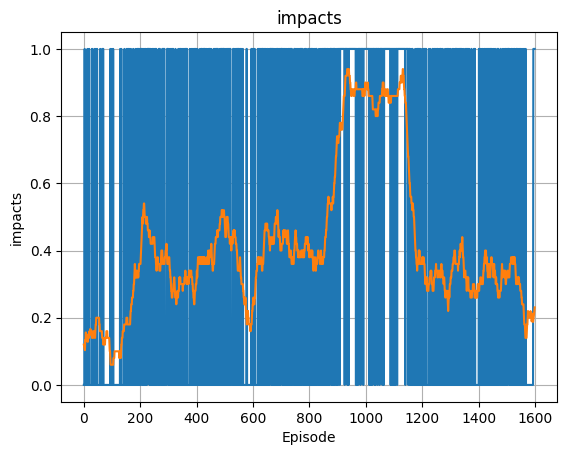

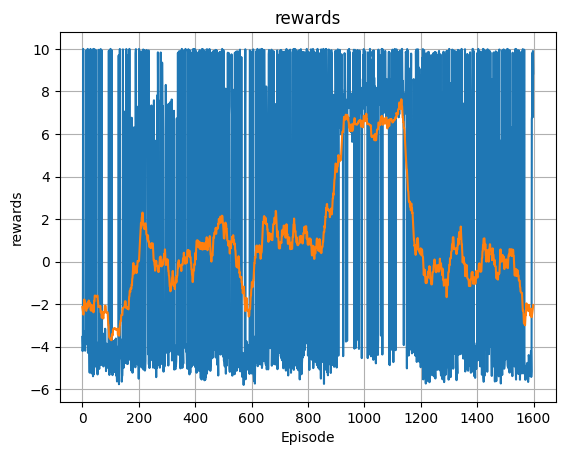

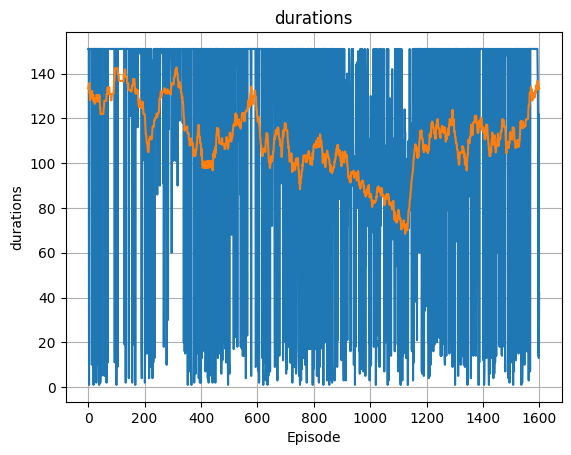

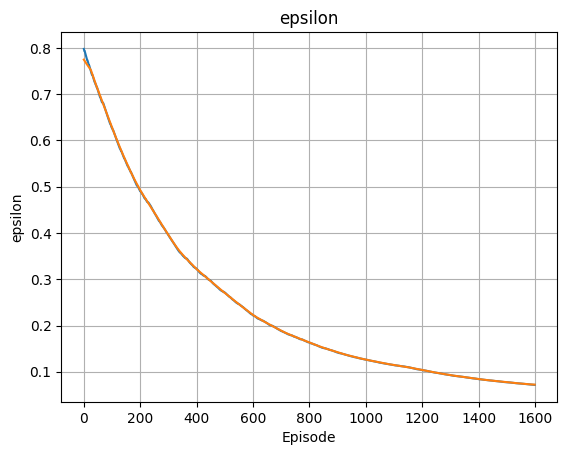

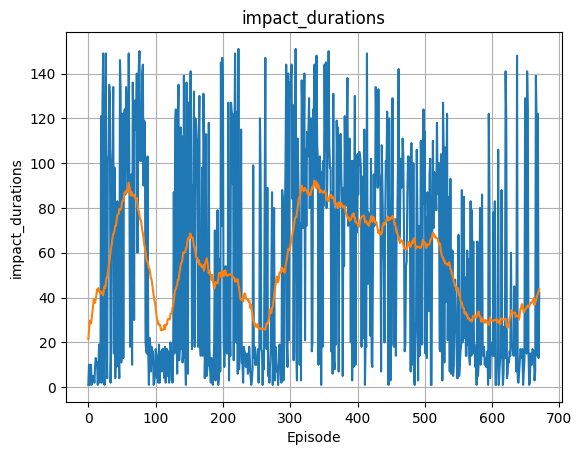

dict_keys(['durations', 'rewards', 'impacts', 'epsilon'])

In [256]:
# Plot training curves 
# def plot_training(path): 
reload(RLManager)

data = Path('Output') / 'ModelStats'
dd = torch.load(data, weights_only=False)
epp = lambda s: RLManager.episode_plot(dd[s], s)
target_impact_lengths = np.array(dd['durations'])[dd['impacts']]

epp('impacts')
plt.show()
epp('rewards')
plt.show()
epp('durations')
plt.show()
epp('epsilon')
plt.show()
RLManager.episode_plot(target_impact_lengths, 'impact_durations')
plt.show()

dd.keys()

In [252]:
# Load the model 
save_loc = Path('Output')
# save_loc = Path("Archive") / "Missile_08_1600e_dist_loss"

model = torch.load(save_loc / 'ModelTorch.pkl', weights_only=False)  # Needs access to DQN class \

# Try reloading the best checkpoint 
try: 
    weights = torch.load(save_loc / 'CheckpointWeights.wts', weights_only=True)
    model.load_state_dict(weights)
    print("Successfully loaded checkpoint.") 
except Exception as e: 
    print("Loading weights failed: ") 
    print(e)

Successfully loaded checkpoint.


In [255]:
# Test the model 
reload(MissileEnv)

# Behavior vars 
pause_frames = False 

# env = gym.make("CartPole-v1", render_mode='human')
# name = 'cart' 

env = MissileEnv.MissileEnv()
env.render_mode = 'human'
env.follow_missile = False
env.move_target = True
name = 'missile'

observation, info = env.reset()

# Run the model
frames_per_pause = 15
n = 500
da = (env.action_size-1)/2
actions = []
rewards = []
tx = []
ty = []
mx = []
my = []
obs = observation[np.newaxis, :]
for _ in range(n):
    print(f"Step {_}")
    # action = env.action_space.sample()
    state = torch.tensor(observation, dtype=torch.float32, device=device).unsqueeze(0)
    action = model(state).max(1).indices.view(1, 1)
    actions.append((action.cpu().numpy()[0][0]-da)/da)
    observation,reward, terminated, truncated, info = env.step(action.item())

    # Tracking 
    print(f"obs   : {observation}")
    obs = np.concat((obs, observation[np.newaxis, :]), axis=0)
    rewards.append(reward)
    tx.append(env.target.position.x)
    ty.append(env.target.position.y)
    mx.append(env.missile.position.x)
    my.append(env.missile.position.y)
    
    # Plotting 
    if pause_frames: 
        if (_+1) % frames_per_pause == 0: 
            clear_output()
            plt.plot(actions, '.-')
            plt.plot(obs[:, 4], '.-')
            plt.plot(obs[:, 2], '.-')
            plt.plot(obs[:, 3], '.-')
            plt.plot(rewards, '.-')
            plt.legend(["Action", 'distance', "v_inline", 'v_offline', 'reward'])
            plt.grid()
            plt.show()
        
            x = input("continue?")
            if x == 'quit': 
                break
    
    if terminated or truncated:
        observation, info = env.reset()
        break

Step 0
env action: 1.0
obs   : [-0.01237824 -0.91331695 -0.40095074 -0.91609961  0.91340083]
Step 1
env action: 1.0
obs   : [-0.16343754 -0.88891022 -0.53927574 -0.84212925  0.90381039]
Step 2
env action: 1.0
obs   : [-0.30911925 -0.84925234 -0.65488448 -0.755729    0.90376117]
Step 3
env action: 1.0
obs   : [-0.44799422 -0.79562492 -0.74840735 -0.66323935  0.9130815 ]
Step 4
env action: 0.5
obs   : [-0.5400256  -0.75607877 -0.79408277 -0.60780963  0.92913011]
Step 5
env action: -1.0
obs   : [-0.51047312 -0.79565243 -0.73927954 -0.67339867  0.9453283 ]
Step 6
env action: -1.0
obs   : [-0.47785429 -0.83463023 -0.66805267 -0.74411399  0.96174443]
Step 7
env action: 1.0
obs   : [-0.61458722 -0.77248617 -0.73785471 -0.67495957  0.98714352]
Step 8
env action: -1.0
obs   : [-0.57563065 -0.81770983 -0.64959588 -0.76027968  1.        ]
Step 9
env action: 1.0
obs   : [-0.68629992 -0.72731866 -0.71006052 -0.70414065  1.        ]
Step 10
env action: -1.0
obs   : [-0.63546808 -0.77212714 -0.606688

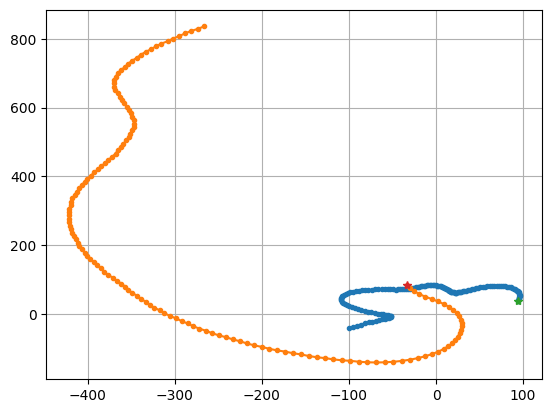

In [254]:
# Plot position over time 
plt.plot(tx, ty, '.-')
plt.plot(mx, my, '.-')
plt.plot(tx[0], ty[0], '*')
plt.plot(mx[0], my[0], '*')
plt.grid()

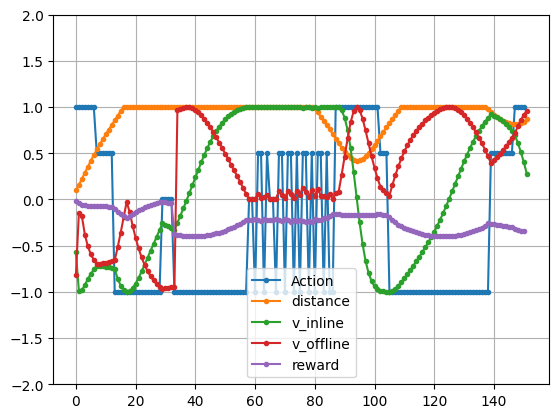

In [210]:
# Plot human readable inputs / outputs
reward_mult = 10
plt.plot(actions, '.-')
plt.plot(obs[:, 4], '.-')
plt.plot(obs[:, 2], '.-')
plt.plot(obs[:, 3], '.-')
plt.plot(np.array(rewards)*reward_mult, '.-')
plt.legend(["Action", 'distance', "v_inline", 'v_offline', 'reward'])
plt.ylim([-2, 2])
plt.grid()

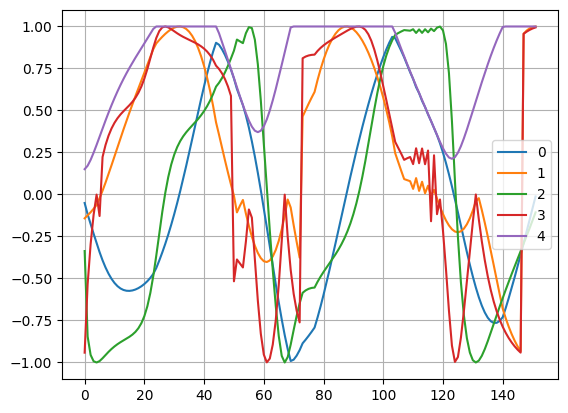

In [197]:
n = 5
plt.figure()
plt.plot(obs[:, 0:n])
plt.legend(list(range(n)))
plt.grid()

In [173]:
np.abs(observation[3])

np.float64(0.18939055053765502)

In [43]:
reward

10